In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import numpy as np
import math
from scipy.stats import norm, gamma, poisson
import operator
import pandas as pd
import sys
from functools import reduce
import time

In [3]:
def simSIR(N, beta, gamma):
    # initial number of infectives and susceptibles;
    I = 1
    S = N-1
    
    # recording time;
    t = 0
    times = np.array(0)
    
    # a vector which records the type of event (1=infection, 2=removal)
    type = np.array(1)
    
    while I > 0:
        
        # time to next event;
        t = t + np.random.exponential(size=1,scale= 1/((beta/N)*I*S + gamma*I)) 
        times = np.append(times, t)

        if np.random.uniform(size=1) < beta*S/(beta*S + N*gamma):
            # infection
            I = I+1
            S = S-1
            type = np.append(type,1)
        else:
            #removal
            I = I-1
            type = np.append(type,2)

    return {'removal.times': times[type == 2] - min(times[type == 2]),
           'final.size' : N-S,
           'T' : times[times.size-1] }



def abcSIR_binned(obs_data_binned, breaks_data, obs_duration, N, epsilon, prior_param, samples):
    
    # first retrieve the final size of the observed data
    final_size_obs = obs_data_binned.size
    
    # matrix to store the posterior samples
    post_samples = np.nan * np.zeros((samples,2))

    K = 0
   
    i = 0
    
    while i < samples:
        
        # counter
        K = K + 1
        
        # draw from the prior distribution
        beta = np.random.exponential(size = 1, scale = 1/prior_param[0])   
        gamma = np.random.exponential(size = 1, scale = 1/prior_param[1]) 
        
        # simulate data
        sim_data = simSIR(N, beta, gamma)
        sim_duration = sim_data['T']
        sim_data_binned = np.array(sum(sim_data['removal.times']<=breaks_data[1]))
        for j in range(1,len(breaks_data)-1):
            sim_data_binned = np.append(sim_data_binned, sum((breaks_data[j]<sim_data['removal.times']) & (sim_data['removal.times']<=breaks_data[j+1])))
        
        #check if the final size matches the observedata
        d = np.sqrt( sum((obs_data_binned - sim_data_binned)**2) + ((obs_duration - sim_duration)/50)**2 )
        
        if d < epsilon:
            i = i + 1
            print(i)
            post_samples[i-1,] = np.array((beta,gamma)).reshape((1,2))
         
        print(K)
    return post_samples



In [19]:
#read data from DUMC
flu = pd.read_csv("flu.csv")

In [20]:
flu.head(5)

,N,day
0,1,0
1,1,4
2,1,12
3,2,16
4,1,18


In [16]:
#fit vanilla ABC model
start = time.time()
out = abcSIR_binned(obs_data_binned = np.array(flu.N.values),
                    breaks_data = np.r_[np.array(flu.day.values), np.inf],
                    obs_duration = 724, 
                    N = 1513, 
                    epsilon = 128, 
                    prior_param = np.array((0.1,0.1)), 
                    samples = 500)
end = time.time()

1
1
2
2
3
4
5
3
6
4
7
5
8
6
9
7
10
8
11
9
12
13
10
14
15
11
16
12
17
13
18
19
14
20
15
21
22
16
23
17
24
25
18
26
27
28
19
29
30
20
31
21
32
33
22
34
35
36
37
38
39
40
23
41
24
42
25
43
44
26
45
27
46
28
47
48
29
49
50
51
30
52
53
31
54
32
55
33
56
34
57
35
58
36
59
60
37
61
62
63
64
65
38
66
39
67
40
68
41
69
70
42
71
43
72
44
73
45
74
46
75
47
76
48
77
78
49
79
50
80
81
51
82
83
52
84
53
85
54
86
55
87
56
88
89
90
57
91
58
92
59
93
94
60
95
61
96
62
97
63
98
99
64
100
65
101
102
103
66
104
67
105
68
106
69
107
70
108
109
71
110
72
111
73
112
74
113
75
114
115
76
116
117
77
118
78
119
120
121
122
79
123
80
124
81
125
82
126
127
83
128
129
130
84
131
85
132
86
133
134
135
87
136
88
137
89
138
90
139
91
140
92
141
142
93
143
94
144
95
145
96
146
147
97
148
98
149
150
99
151
100
152
153
101
154
155
156
102
157
103
158
104
159
105
160
161
162
106
163
107
164
108
165
166
109
167
110
168
111
169
112
170
113
171
114
172
173
174
175
115
176
116
177
178
117
179
118
180
181
119
182
120
183
121


In [9]:
out.shape

(500, 2)

In [10]:
out

array([[3.04752334e+00, 7.20399470e+00],
       [2.64927728e+00, 3.40957030e+00],
       [9.24189775e+00, 1.28785200e+01],
       [3.74760759e+00, 5.86498848e+00],
       [2.66469317e+01, 6.28597316e+01],
       [2.80933098e+00, 2.25989436e+00],
       [1.07668222e+00, 1.03279645e+01],
       [1.69026444e+01, 3.75351030e+00],
       [8.33451461e+00, 1.26063984e+01],
       [1.13850333e+01, 2.99510817e+00],
       [9.61306502e+00, 7.95732389e+00],
       [2.14805902e-03, 9.72462531e-01],
       [4.54731925e+00, 1.40796448e+01],
       [4.51201068e+00, 2.26233465e+01],
       [3.05508110e+00, 6.42930113e+00],
       [1.42661393e+00, 6.56527170e+00],
       [1.28265940e+01, 2.19717351e+01],
       [1.51859754e+01, 2.33453671e+01],
       [1.28419800e+01, 1.87926624e+01],
       [1.12791664e+00, 1.18934494e+01],
       [9.70889418e+00, 2.20869649e+01],
       [5.64138550e+00, 7.22100244e+00],
       [3.77426787e+00, 2.25421319e+00],
       [6.34501434e+00, 9.04465512e+00],
       [3.116952

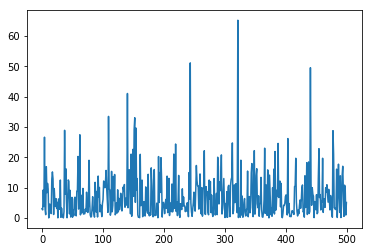

In [11]:
plt.plot(out[:,0])
pass

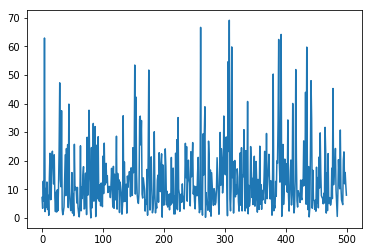

In [12]:
plt.plot(out[:,1])
pass

In [21]:
np.mean(out[:,0])

6.799680358507096

In [22]:
np.std(out[:,0])

6.863327739352482

In [18]:
np.mean(out[:,1])

13.394731274750018

In [23]:
np.std(out[:,1])

11.044220917888588